In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pandas as pd

In [240]:

def load_data(project_dir,prefix="test_"):
    result_list=[]
    for path in glob.glob(f"{project_dir}/*/eval/{prefix}*.json"):
        #load eval data
        with open(path,"r") as f:
            d=(json.load(f))

        if d is None:
            continue
        nickname,epochs,r,n_train=path.split("/")[-3].split("_")

        mode=path.split("/")[-1].split("_")[0]
        d["Model"]=nickname
        d["Epochs"]=int(epochs)
        d["r"]=int(r)
        d["Training records"]=int(n_train)
        d["mode"]=mode



        result_list.append(d)

    return result_list



In [241]:
#prediction with reason
result_list=load_data("results/projects/240118comparisons","")
for res in result_list:
    res["Reasoning"]=True

#prediction wo reason
result_list2=load_data("results/projects/240118comparisons_wo_reason","")
for res in result_list2:

    if res["Model"]!="Random forest":
        res["Reasoning"]=False
    else:
        res["Reasoning"]=True

result_list.extend(result_list2)

In [242]:
result_df=pd.DataFrame(result_list)
result_df=result_df[result_df["r"]==32]
result_df=result_df[result_df["Epochs"]==3]

result_df["Condition"]=result_df["mode"]+"-"+result_df["Reasoning"].astype(str)
result_df

,MSE,MAE,R2,Answer ratio,plot,Model,Epochs,r,Training records,mode,Reasoning,Condition
2,12582.604500,88.690000,-0.468188,0.80,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-70b(4bit)-Full-Prompt2,3,32,10,test,True,test-True
3,50403.482083,200.458333,-1.530474,0.60,"[{'name': 'cyclobutane, methylene-', 'smiles':...",Llama2-70b(4bit)-Full-Prompt2,3,32,10,train,True,train-True
4,12497.629235,91.288776,-0.569964,0.98,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-7b-Full,3,32,20,test,True,test-True
5,10591.829625,83.137500,0.164812,1.00,"[{'name': 'Zonisamide', 'smiles': 'NS(=O)(=O)C...",Llama2-7b-Full,3,32,20,train,True,train-True
6,18673.439079,96.539474,-0.466443,0.95,"[{'name': 'Zonisamide', 'smiles': 'NS(=O)(=O)C...",Llama2-13b-Full,3,32,20,train,True,train-True
...,...,...,...,...,...,...,...,...,...,...,...,...
314,12858.067650,84.433000,-0.547416,1.00,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-7b-Full,3,32,0,test,False,test-False
315,6314.917650,60.297000,0.240025,1.00,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-7b-Full,3,32,10000,test,False,test-False
316,5065.573000,55.480000,0.401482,1.00,"[{'name': 'methetoin', 'smiles': 'CCC1(NC(=O)N...",Llama2-7b-Full,3,32,10000,train,False,train-False
317,5110.773000,55.880000,0.396141,1.00,"[{'name': 'methetoin', 'smiles': 'CCC1(NC(=O)N...",Llama2-7b-Full,3,32,10000,train,False,train-False


In [243]:
model_list=[
"Mixtral-Full",
"Llama2-7b-Full",
"Llama2-13b-Full",
"Llama2-70b(4bit)-Full-Prompt2",
"GPT-3.5-turbo",
"Random forest",
]

for model in model_list:
    break
    sel_df=result_df[result_df["Model"]==model]
    sel_df=sel_df.sort_values(by="Condition")
    plt.figure()
    sns.lineplot(x="Training records",y="MSE",hue="Condition",data=sel_df)
    plt.title(model)
    plt.xscale("log")

#plt.ylim(4000,12000)

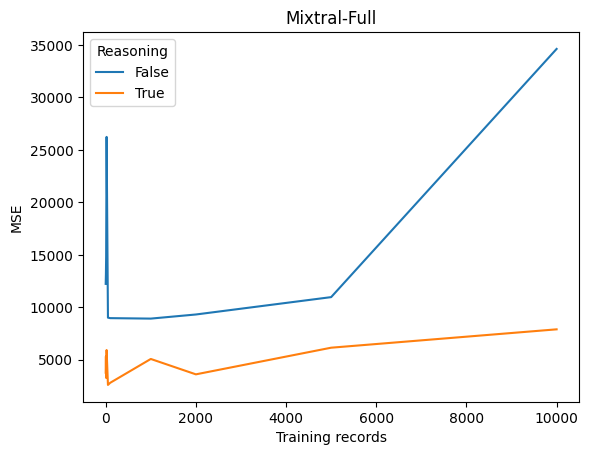

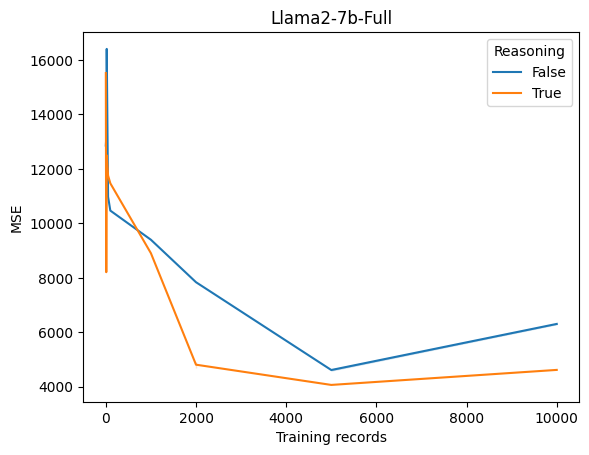

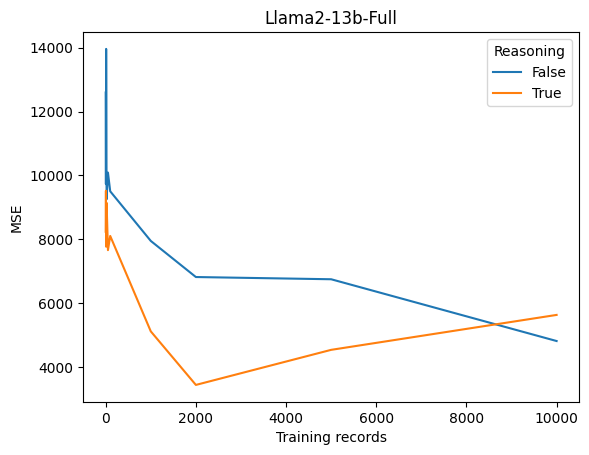

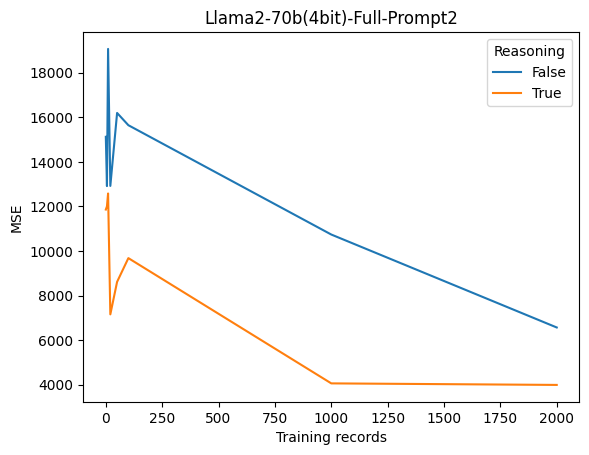

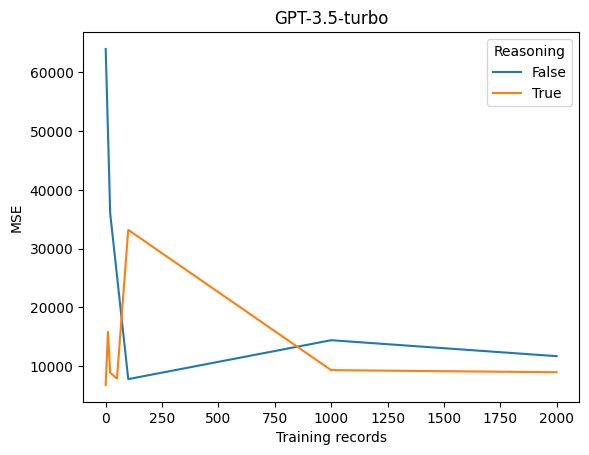

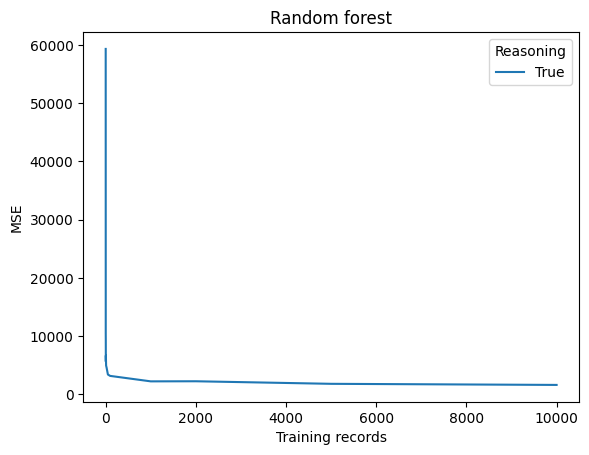

In [244]:

for model in model_list:
    sel_df=result_df[result_df["Model"]==model]
    sel_df=sel_df[sel_df["mode"]=="test"]
    sel_df=sel_df[sel_df["MSE"]<10**5]
    plt.figure()
    try:
        sns.lineplot(x="Training records",y="MSE",hue="Reasoning",data=sel_df)
        plt.title(model)
        #plt.xscale("log")
        plt.ylabel("MSE")
        #plt.ylim(0,16000)
    except Exception as e:
        print(e)

#plt.ylim(4000,12000)

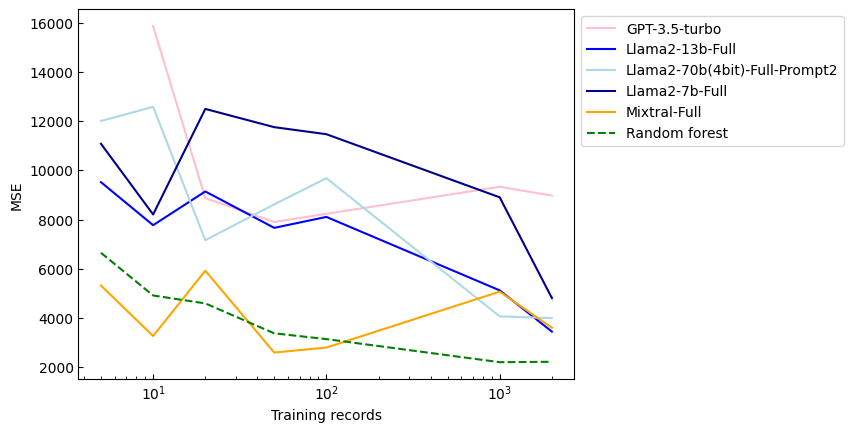

In [250]:
sel_df=result_df[result_df["mode"]=="test"]
sel_df=sel_df[sel_df["Model"]!="Llama2-7b-Part"]
sel_df=sel_df[sel_df["Model"]!="GPT-4-turbo"]
sel_df=sel_df[sel_df["Reasoning"]==True]
sel_df=sel_df[sel_df["MSE"]<20000]
sel_df=sel_df[sel_df["Training records"]<5000]
sel_df=sel_df[sel_df["Training records"]>=5]
sel_df=sel_df.sort_values(by="Training records")
sel_df=sel_df.sort_values(by="Model")
plt.figure()

#sns.lineplot(x="Training records",y="MSE",hue="Model",data=sel_df)
palette = {
    'GPT-3.5-turbo': 'pink', 
    'Llama2-7b-Full': 'darkblue', 
    'Llama2-13b-Full':  'blue',
    'Llama2-70b(4bit)-Full-Prompt2':   'lightblue',
    'Mixtral-Full': 'orange', 
    'Random forest': 'green'
}

#sns.lineplot(x="Training records", y="MSE", hue="Model", data=sel_df, palette=palette)
sns.lineplot(x="Training records", y="MSE", hue="Model",
              #data=sel_df,
data= sel_df[sel_df['Model'] != 'Random forest'],
            palette=palette)

# "Random forest"のデータを特定して破線にする
rf_data = sel_df[sel_df['Model'] == 'Random forest'].sort_values(by="Training records")
plt.plot(rf_data["Training records"], rf_data["MSE"], label='Random forest', color='green', linestyle='--')
plt.xscale("log")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Number of training data")
plt.tick_params(direction='in', which='both')
plt.show()

In [246]:
set(sel_df["Model"])

{'GPT-3.5-turbo',
 'Llama2-13b-Full',
 'Llama2-70b(4bit)-Full-Prompt2',
 'Llama2-7b-Full',
 'Mixtral-Full',
 'Random forest'}

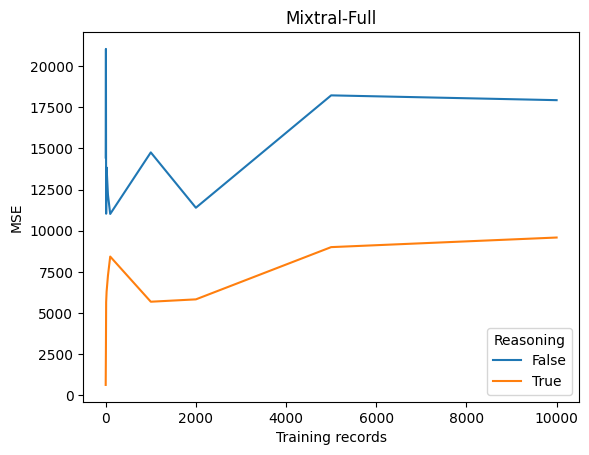

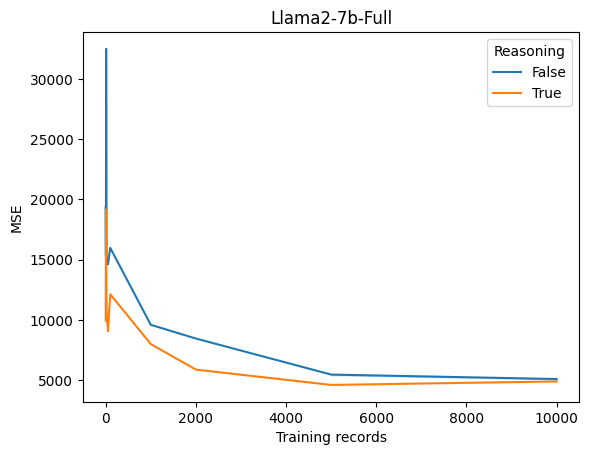

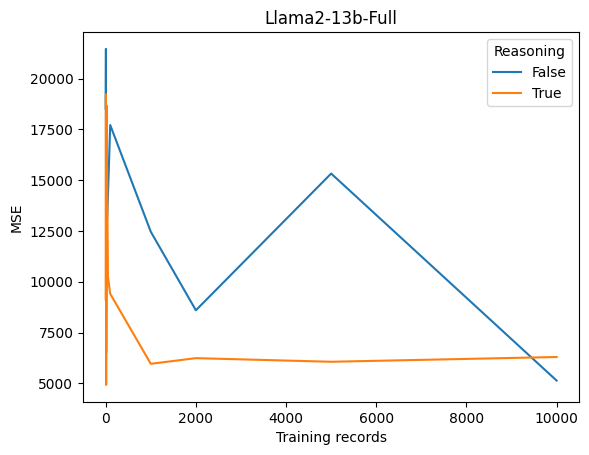

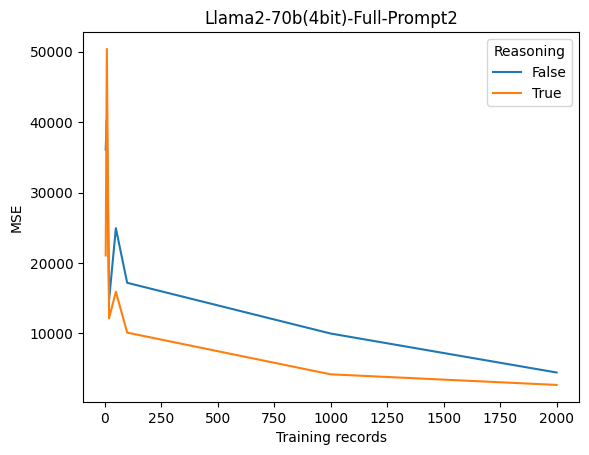

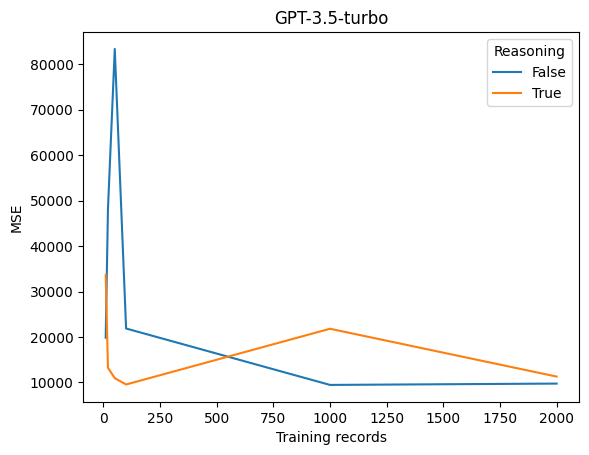

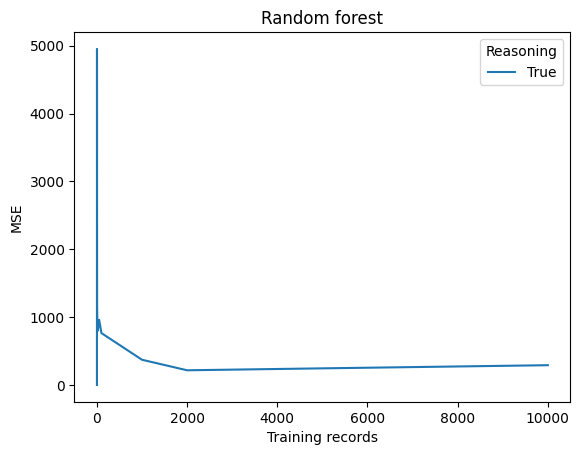

In [247]:

for model in model_list:
    sel_df=result_df[result_df["Model"]==model]
    sel_df=sel_df[sel_df["mode"]=="train"]
    sel_df=sel_df[sel_df["MSE"]<10**5]
    plt.figure()
    sns.lineplot(x="Training records",y="MSE",hue="Reasoning",data=sel_df)
    plt.title(model)
    #plt.xscale("log")
    plt.ylabel("MSE")
    #plt.ylim(0,20000)

#plt.ylim(4000,12000)